In [461]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_data=pd.merge(ride_data,city_data, how='outer', on=['city'])
# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [463]:
#New df with type, city, fare, and driver count
reduced_pyber_data = pyber_data.loc[:, ["type", "city", "fare", "driver_count", "ride_id"]]
#New df with avg fares per city, driver count and city type grouped by city
city_df = reduced_pyber_data.groupby('city').agg({'driver_count': 'first', 
                                                  'fare': 'mean', 
                                                  'type': 'first'})
#Rename columns for city_df 
city_df = city_df.rename(columns={"fare":"Avg Fare", 
                                  "driver_count":"Total Drivers", 
                                  "type":"City Type"})
city_df["Total Rides"] = reduced_pyber_data.groupby(['city'])["city"].count()
#Organized columns
city_df = city_df[["Total Drivers", "Total Rides", "Avg Fare", "City Type"]]
# Orhanize data for plot based on the city type
urban_data = city_df.loc[city_df["City Type"]=="Urban"]
rural_data = city_df.loc[city_df["City Type"]=="Rural"]
suburban_data = city_df.loc[city_df["City Type"]=="Suburban"]


## Bubble Plot of Ride Sharing Data

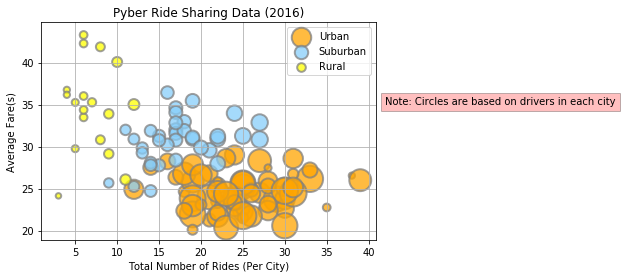

In [519]:
# Obtain the x and y coordinates for each of the three city types
x_urban = urban_data["Total Rides"]
y_urban = urban_data["Avg Fare"]
z_urban = urban_data["Total Drivers"]
x_suburban = suburban_data["Total Rides"]
y_suburban = suburban_data["Avg Fare"]
z_suburban = suburban_data["Total Drivers"]
x_rural = rural_data["Total Rides"]
y_rural = rural_data["Avg Fare"]
z_rural = rural_data["Total Drivers"]

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s=z_urban*10, c="Orange",edgecolors="grey", linewidth=2,
            alpha=0.75, label="Urban");
plt.scatter(x_suburban, y_suburban, s=x_suburban*10,c="lightskyblue",edgecolors="grey", 
            linewidth=2, alpha=0.75, label="Suburban");
plt.scatter(x_rural, y_rural, s=x_rural*10,c="Yellow",edgecolors="grey", linewidth=2, 
            alpha=0.75, label="Rural")
           
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare(s)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(loc="best" )

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: Circles are based on drivers in each city", bbox=dict(facecolor='red', alpha=0.25))

# Save Figure
plt.grid()
plt.savefig("Images/pyber_city_scatter_plot.png")

In [509]:
# Show plot
plt.show()

## Total Fares by City Type

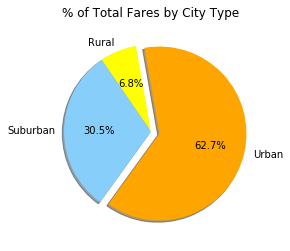

In [469]:
# Calculate Type Percents
fare_df = reduced_pyber_data.groupby('type').agg({'fare': 'sum', 
                                                  'type': 'first'})
#Add % of fares by city type
fare_df["% of Total Fares"]= (reduced_pyber_data.groupby(['type'])["fare"].sum()
                              /reduced_pyber_data["fare"].sum())*100
# Build Pie Chart
sizes = fare_df["% of Total Fares"]
explode = [0,0,0.1]
labels = fare_df["type"]
colors = ["Yellow", "lightskyblue", "Orange"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/total_fares_by_city_type.png")

In [470]:
# Show Figure
plt.show()

## Total Rides by City Type

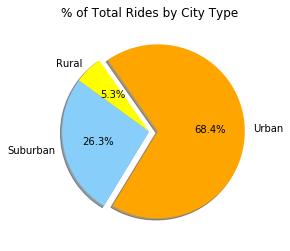

In [471]:
# Calculate Type Percents
rides_df = reduced_pyber_data.groupby('type').agg({'ride_id': 'count', 
                                                   'type': 'first'})
rides_df["% of Total Rides"]= (reduced_pyber_data.groupby(['type'])["ride_id"].count()
                              /reduced_pyber_data["ride_id"].count())*100
# Build Pie Chart
sizes = rides_df["% of Total Rides"]
explode = [0,0,0.1]
labels = rides_df["type"]
colors = ["Yellow", "lightskyblue", "Orange"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/total_rides_by_city_type.png")

In [472]:
# Show Figure
plt.show()

## Total Drivers by City Type

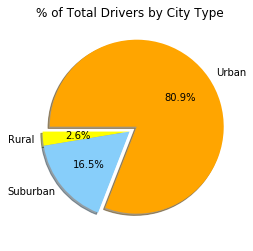

In [520]:
# Calculate Type Percents
driver_df = reduced_pyber_data.groupby('type').agg({'type': 'first'})

#Used this df to get accurate driver count information
test_driver= reduced_pyber_data.groupby('city').agg({'driver_count': 'mean', 
                                                     'type': 'first'})
driver_df["% of Total Drivers"] = (test_driver.groupby(["type"])["driver_count"].sum()
                                    /test_driver["driver_count"].sum())*100
# Build Pie Chart
sizes = driver_df["% of Total Drivers"]
explode = [0,0,0.1]
labels = driver_df["type"]
colors = ["Yellow", "lightskyblue", "Orange"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Images/total_drivers_by_city_type.png")

In [474]:
# Show Figure
plt.show()